In [2]:
!pip install tensorflow


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
# Load the data
df = pd.read_csv('./data/baci_monthly.csv')
values = df['CLOSE']

# Assuming 'values' is a pandas Series
train_size = int(len(values) * 0.7)  # 70% training data
train_data = values.iloc[:train_size].values.reshape(-1, 1)  # Use .iloc to slice the Series and then .values to get the array

scaler = StandardScaler()
scaler.fit(train_data)

values_normalized = scaler.transform(values.values.reshape(-1, 1)).flatten()
print(values_normalized)
print(len(values_normalized))

[-7.84959012e-01 -8.11015674e-01 -8.16666516e-01 -8.44606791e-01
 -8.05992703e-01 -7.32217818e-01 -6.58442933e-01 -5.38205567e-01
 -5.24078462e-01 -5.36949825e-01 -5.95969732e-01 -4.41199442e-01
 -3.91911540e-01 -4.06038646e-01 -4.73848753e-01 -4.31153500e-01
 -4.13259167e-01 -4.10433745e-01 -3.45135124e-01 -3.15625170e-01
 -3.32577697e-01 -4.19851816e-01 -5.10893163e-01 -4.82952888e-01
 -5.63948293e-01 -5.32554725e-01 -5.57041708e-01 -5.58297451e-01
 -7.33787496e-01 -8.04423024e-01 -7.60158093e-01 -8.01597603e-01
 -7.98144311e-01 -7.98458246e-01 -7.73657328e-01 -6.91406179e-01
 -6.67861003e-01 -7.31903882e-01 -7.19660391e-01 -7.43205567e-01
 -7.67064678e-01 -7.29078461e-01 -5.43228538e-01 -5.28787497e-01
 -4.67256104e-01 -3.58948294e-01 -4.66628232e-01 -3.25985047e-01
 -2.87057023e-01 -2.28037115e-01 -2.29606794e-01 -2.35885507e-01
 -1.87853348e-01 -9.86956148e-02  2.70806681e-01  9.83126740e-01
  8.55668853e-01  1.06349427e+00  1.30553868e+00  9.60523371e-01
  6.81120615e-01  4.14589

Epoch 1/500
7/7 [==============================] - 0s 991us/step - loss: 1.2270
Epoch 2/500
7/7 [==============================] - 0s 875us/step - loss: 1.1848
Epoch 3/500
7/7 [==============================] - 0s 1ms/step - loss: 1.1449
Epoch 4/500
7/7 [==============================] - 0s 745us/step - loss: 1.1090
Epoch 5/500
7/7 [==============================] - 0s 721us/step - loss: 1.0745
Epoch 6/500
7/7 [==============================] - 0s 709us/step - loss: 1.0409
Epoch 7/500
7/7 [==============================] - 0s 948us/step - loss: 1.0086
Epoch 8/500
7/7 [==============================] - 0s 977us/step - loss: 0.9815
Epoch 9/500
7/7 [==============================] - 0s 959us/step - loss: 0.9460
Epoch 10/500
7/7 [==============================] - 0s 966us/step - loss: 0.9149
Epoch 11/500
7/7 [==============================] - 0s 1ms/step - loss: 0.8822
Epoch 12/500
7/7 [==============================] - 0s 953us/step - loss: 0.8548
Epoch 13/500
7/7 [=======================

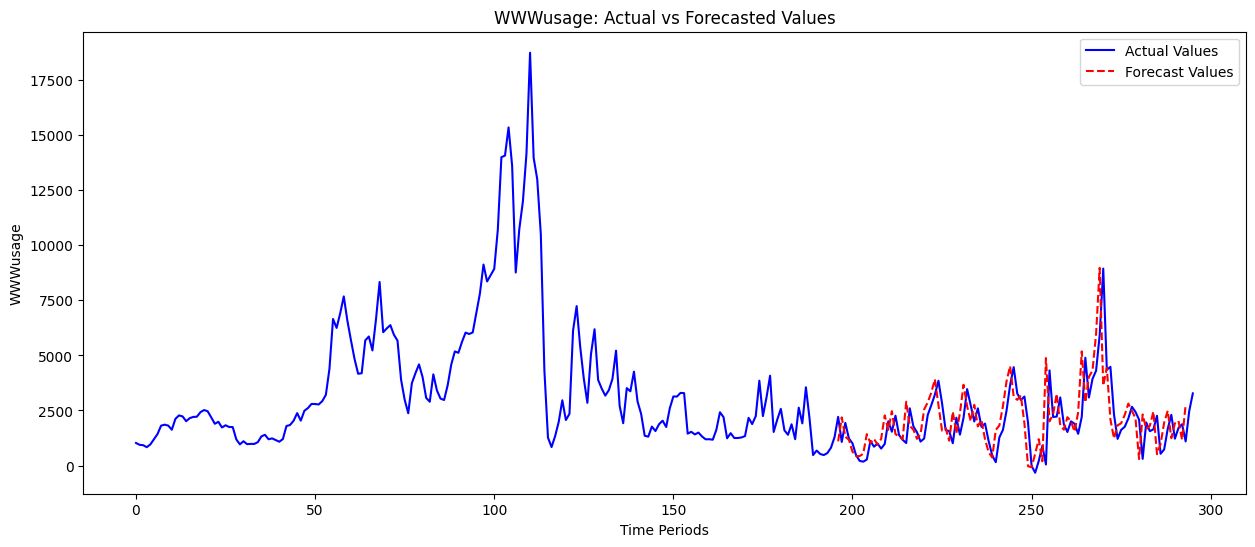

In [10]:
def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

look_back = 2
X, y = create_dataset(values_normalized, look_back)

train_size = int(len(X) * 0.67)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

model = Sequential()
model.add(Dense(units=2, input_dim=look_back, activation='linear'))
model.add(Dense(units=1, activation='linear'))
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.fit(X_train, y_train, epochs=500, verbose=1)

# Rolling Forecast
predictions = []
for i in range(len(X_test)):
    # Predict the next point
    next_pred = model.predict(X_test[i].reshape(1, -1))
    predictions.append(next_pred[0])
    
    # If you'd like the model to train on its prediction (can be omitted if you don't want the model to learn from its own forecast)
    # X_train = np.vstack([X_train, X_test[i]])
    # y_train = np.vstack([y_train, next_pred])
    # model.fit(X_train, y_train, epochs=10, verbose=0)  # We'll train for fewer epochs to save time

y_pred_test = np.array(predictions)

# De-normalize predictions
y_pred_test = scaler.inverse_transform(y_pred_test)
y_actual_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(values_normalized.reshape(-1, 1)), label='Actual Values', color='blue')
plt.plot(np.arange(len(X_train), len(X)), y_pred_test, label='Forecast Values', color='red', linestyle='--')
plt.title("WWWusage: Actual vs Forecasted Values")
plt.xlabel('Time Periods')
plt.ylabel('WWWusage')
plt.legend()
plt.show()